In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = 'w'

In [13]:
asm = 2*np.unpackbits(np.frombuffer(bytes.fromhex('03915ED3'), 'uint8')).astype('float')-1
def load(path, soft=False):
    if soft:
        bits = np.fromfile(path, dtype='float32')/50.0
        plt.figure()
        corr_asm = np.correlate(np.sign(bits), asm, mode='full')
        if np.min(corr_asm) == -asm.size:
            bits *= -1
    else:
        x = np.fromfile(path, dtype='uint8').reshape((-1, 2))
        plt.figure()
        for j in range(x.shape[1]):
            bits = 2*x[:, j].astype('float')-1
            corr_asm = np.correlate(bits, asm, mode='full')
            if np.max(np.abs(corr_asm)) == asm.size:
                j0 = j
                sign = 1 if np.max(corr_asm) == asm.size else -1
                bits = sign * (2*x[:, j0].astype('float')-1)
    plt.plot(corr_asm)
    plt.title('Correlation of the bits with ASM 0x03915ED3')
    plt.ylabel('Correlation')
    plt.xlabel('Lag (bits)')
    corr_asm = np.correlate(np.sign(bits), asm, mode='full')
    asm_start = np.where(corr_asm == asm.size)[0][0] - asm.size + 1
    l = 7680
    bits_pad = np.concatenate((np.zeros(l - (asm_start % l), 'uint8'),
                               bits))
    bits_pad = np.concatenate((bits_pad,
                               np.zeros(l - (bits_pad.size % l), 'uint8')))
    return bits_pad

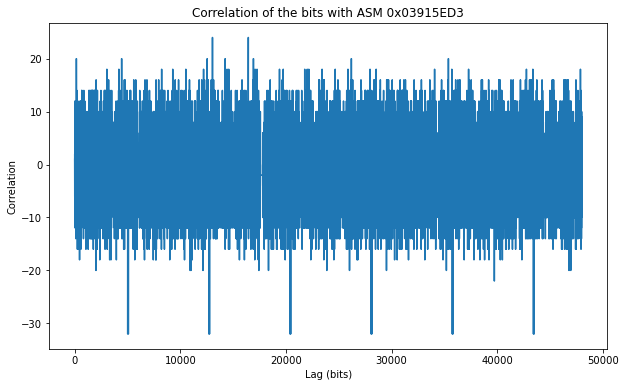

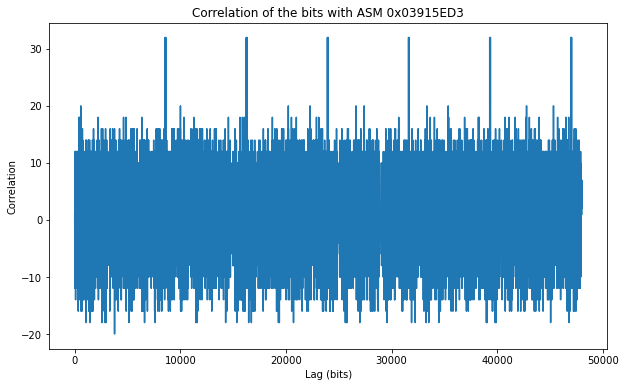

In [14]:
x_11 = load('2020/LLRs_0011.f32', soft=True)
x_15 = load('2020/LLRs_0015.f32', soft=True)

In [15]:
#x_11 = load('2020/viterbi_out_x2_0011.u8')
#x_15 = load('2020/viterbi_out_x2_0015.u8')

In [16]:
x = np.concatenate((x_11, x_15)).reshape((-1, 7680))

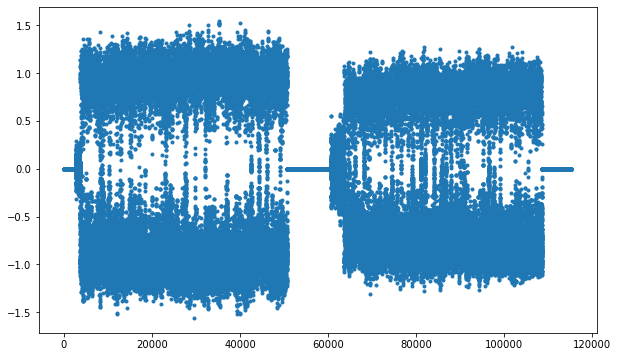

In [17]:
plt.plot(x.ravel(), '.')

/tmp/ipykernel_19923/2636741295.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


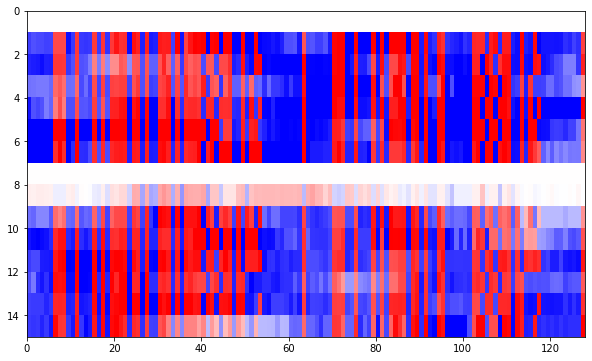

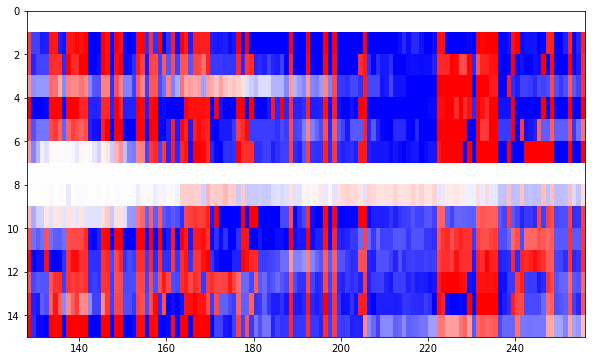

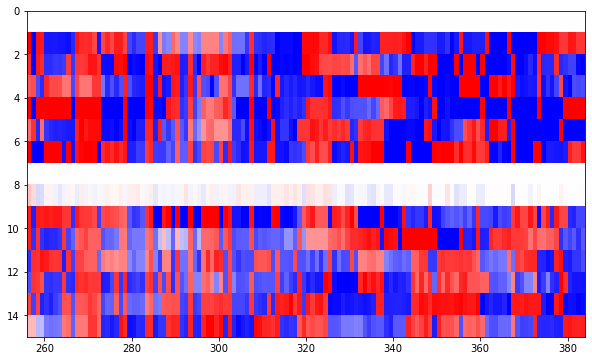

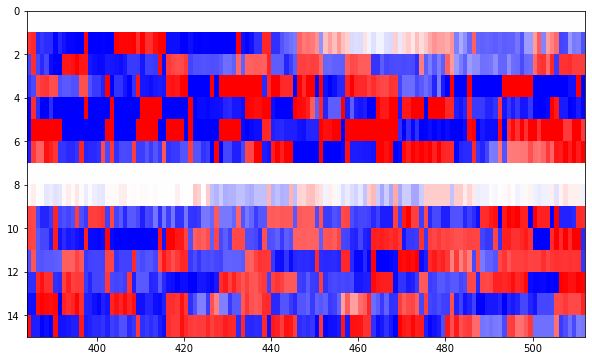

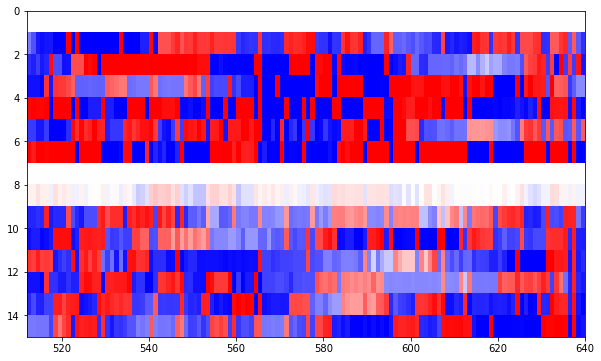

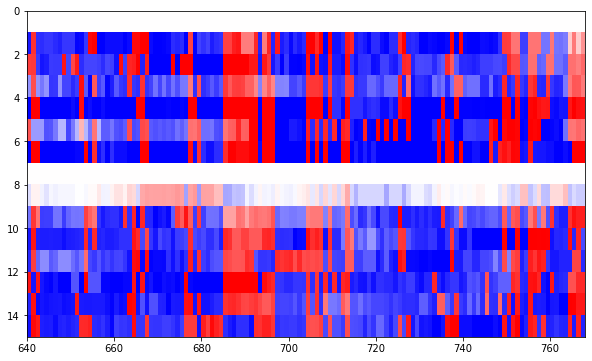

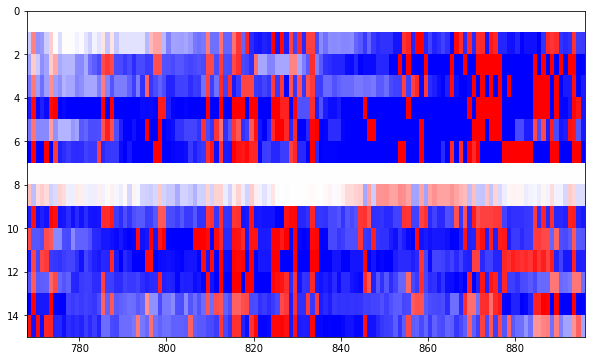

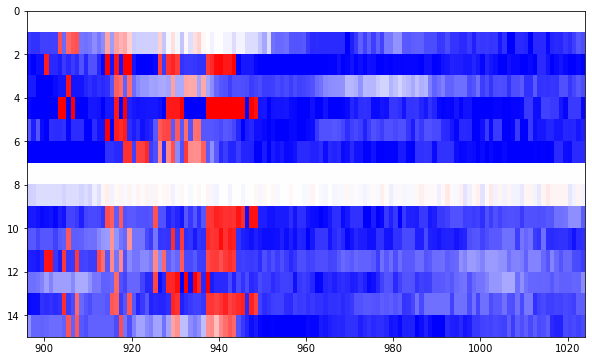

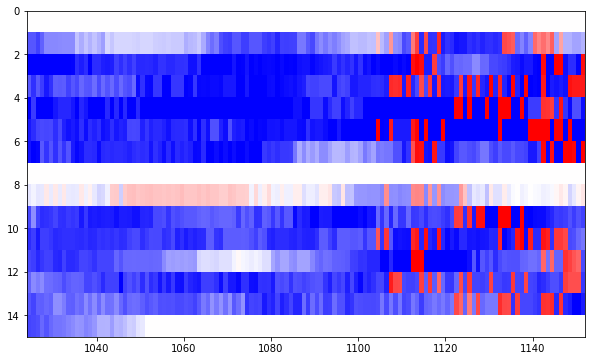

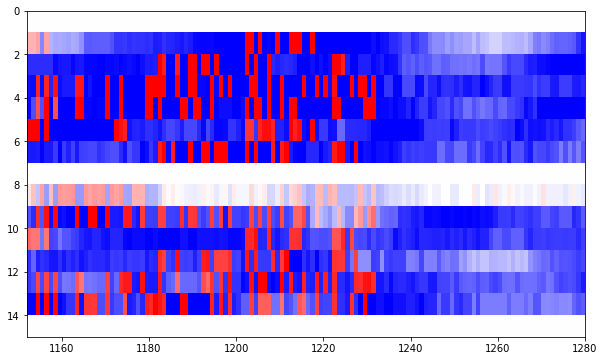

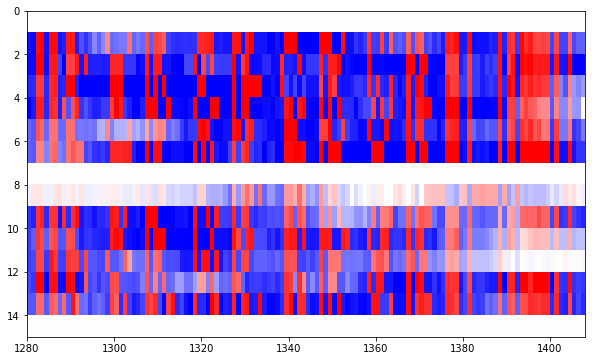

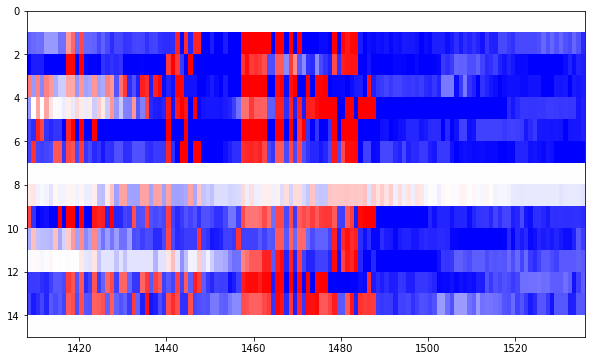

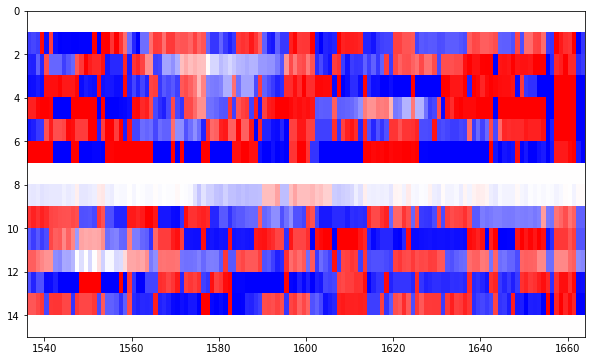

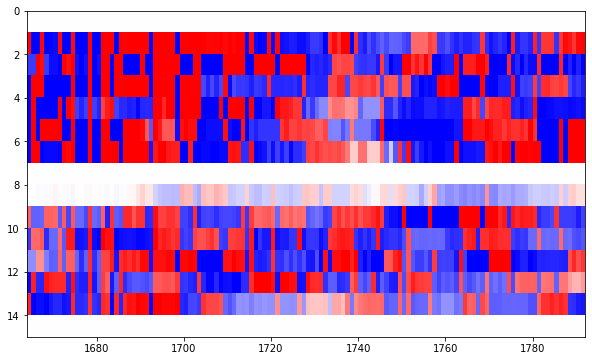

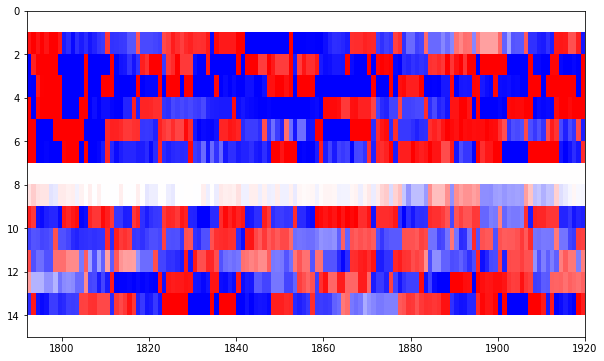

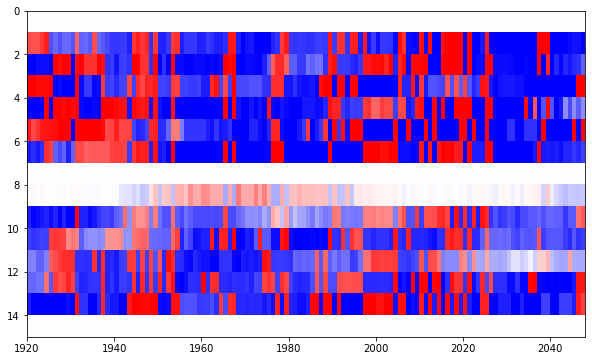

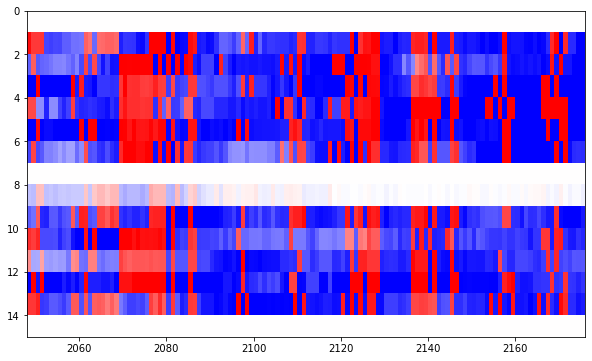

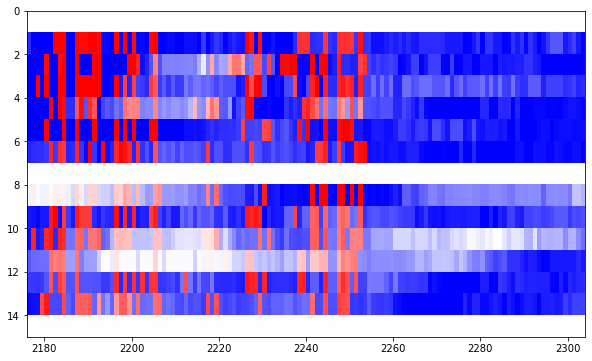

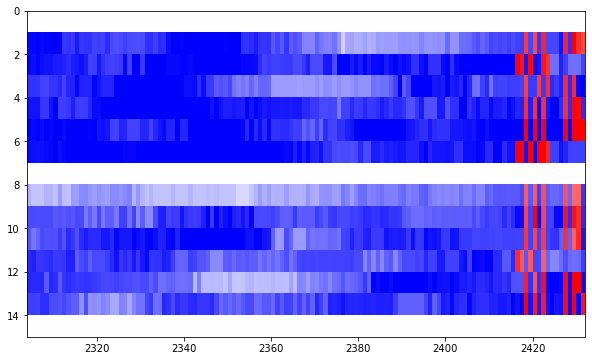

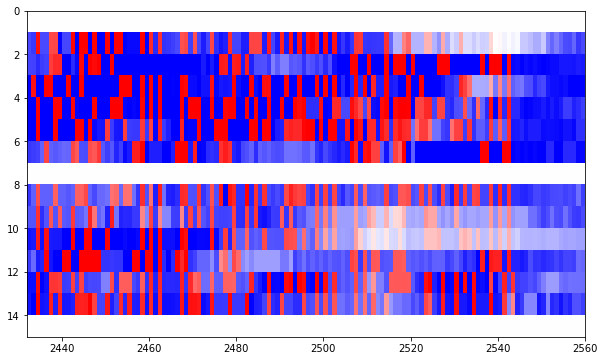

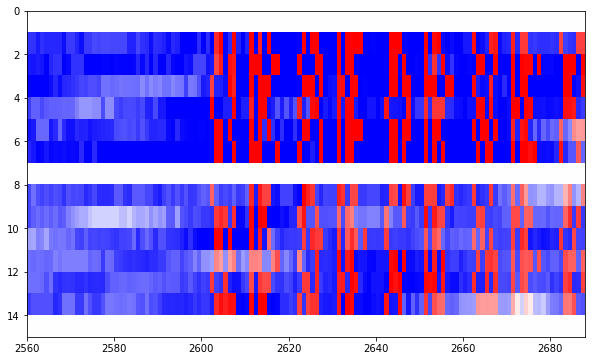

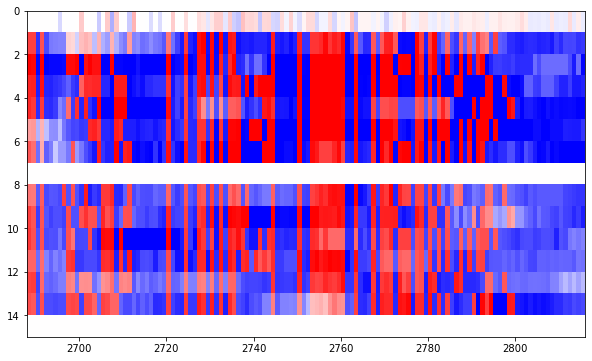

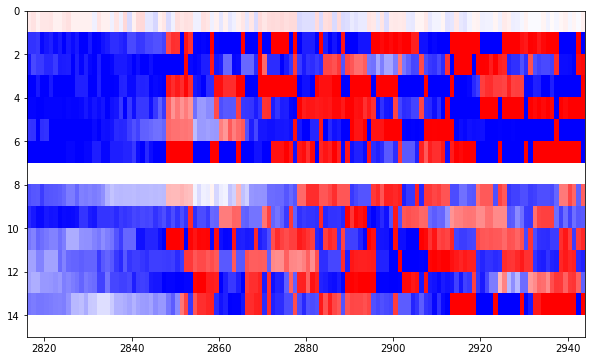

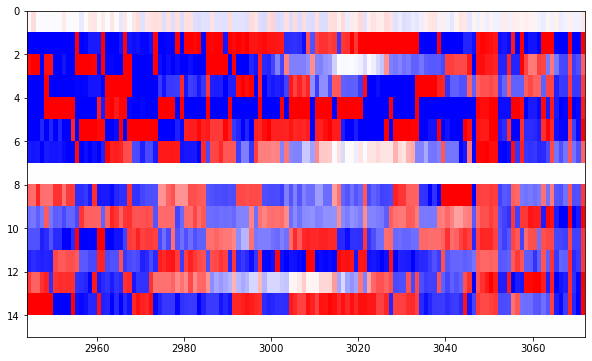

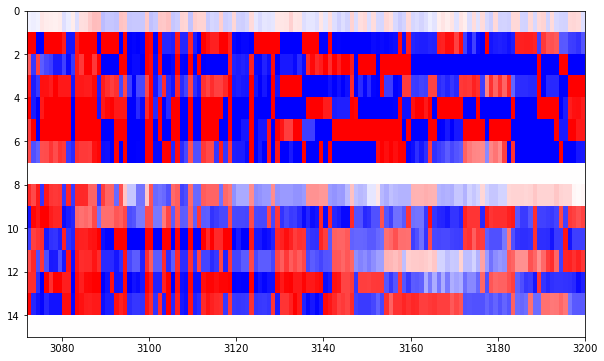

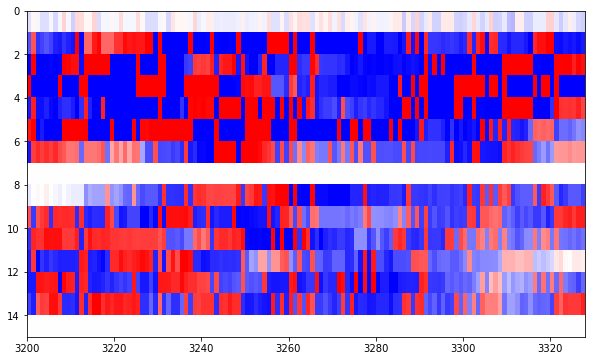

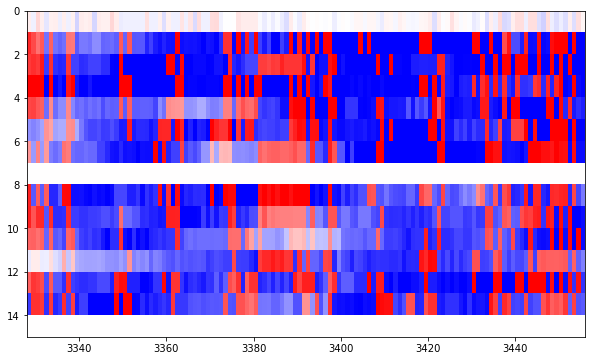

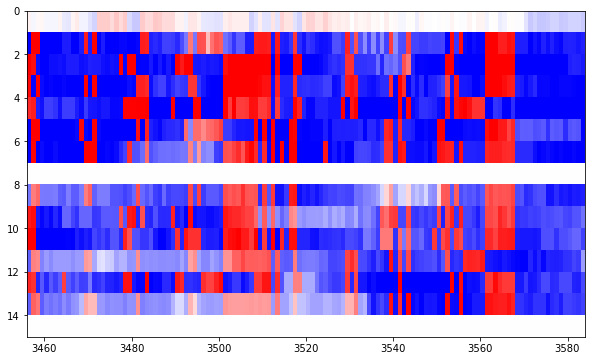

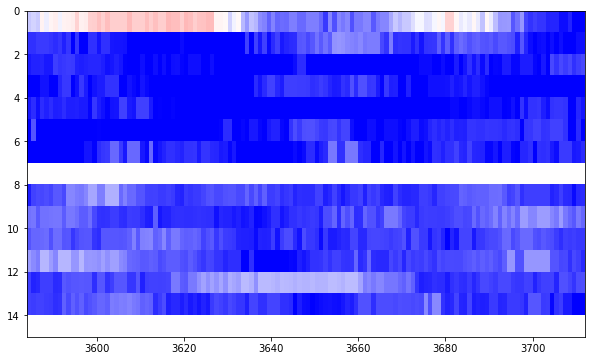

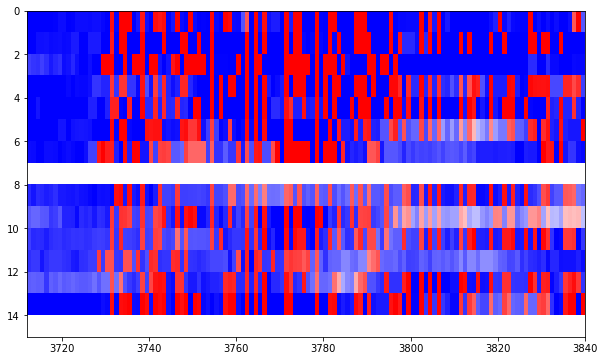

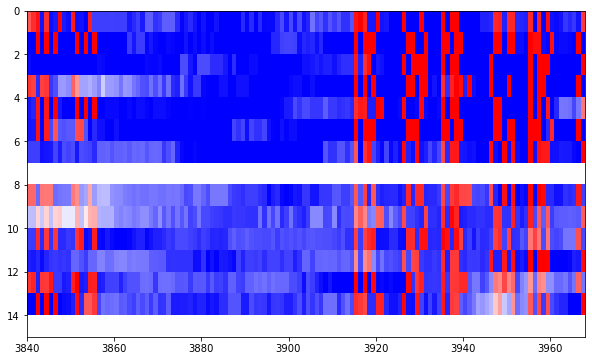

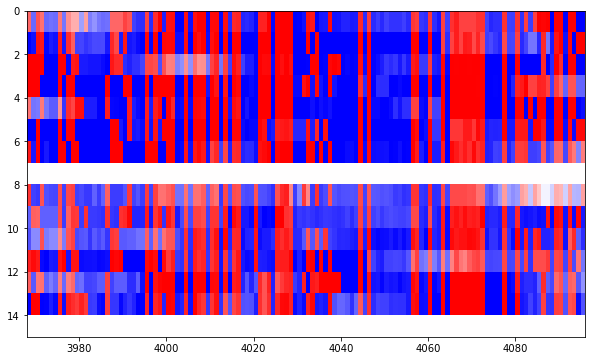

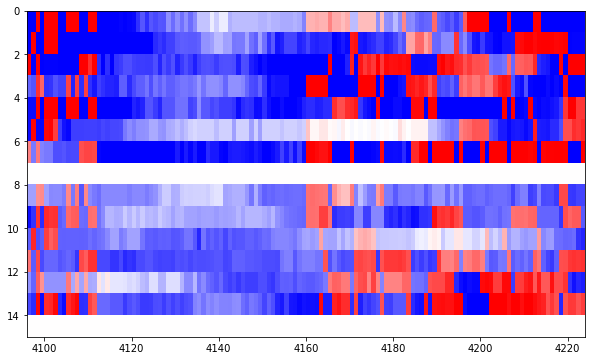

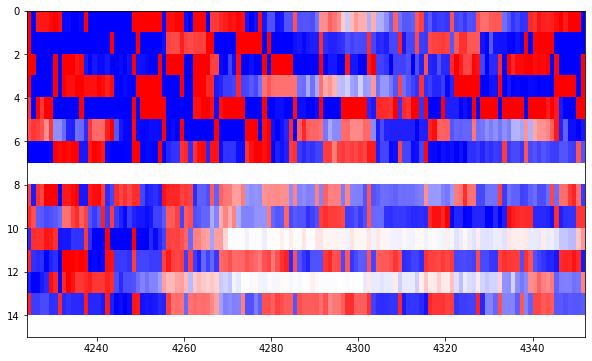

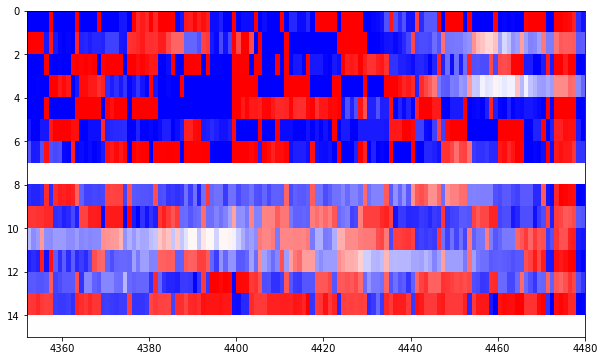

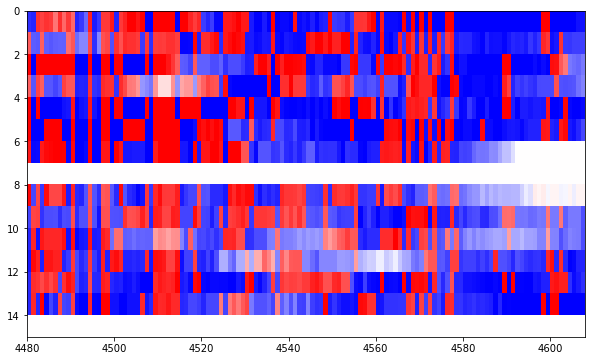

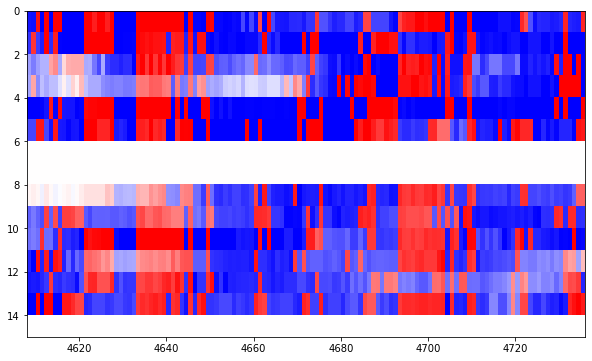

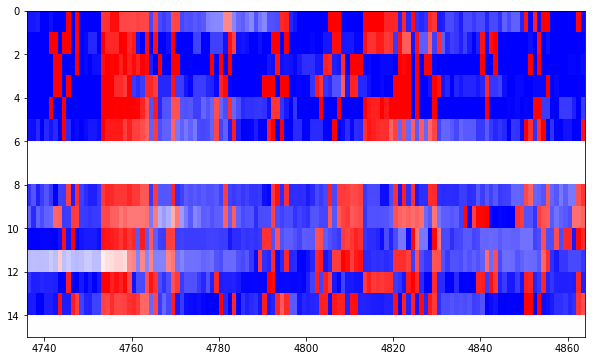

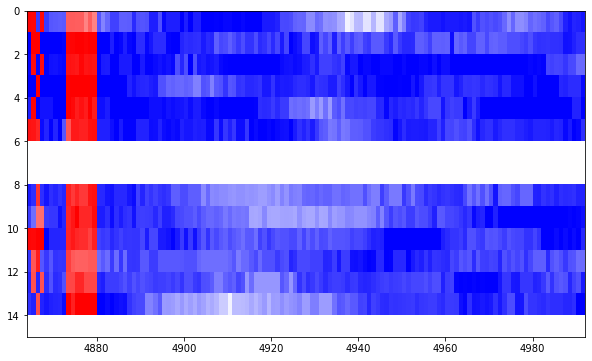

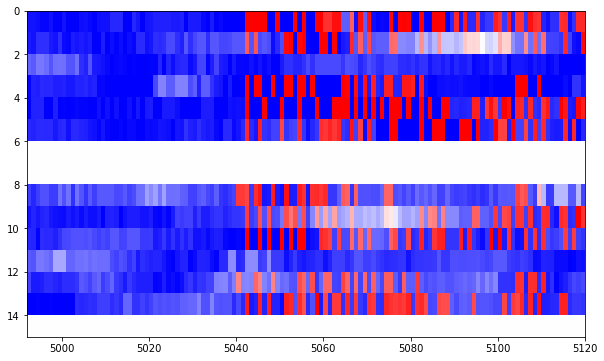

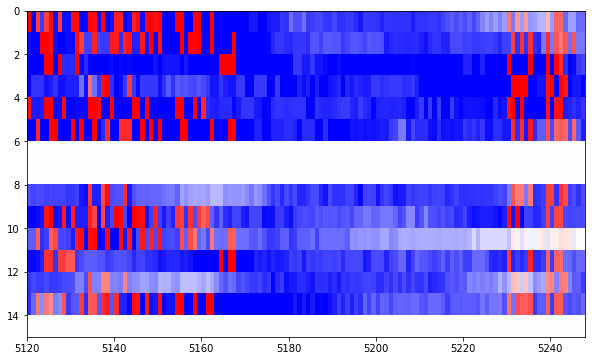

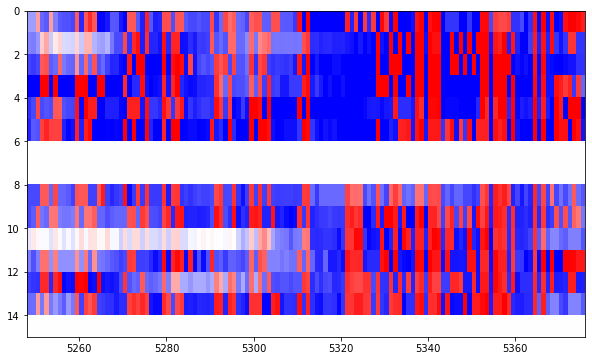

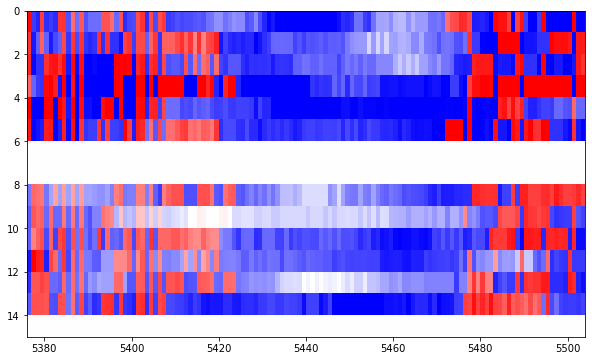

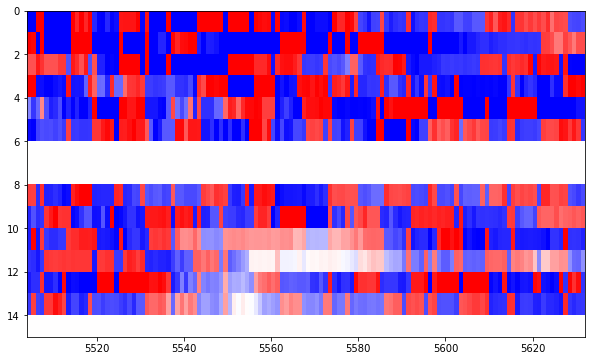

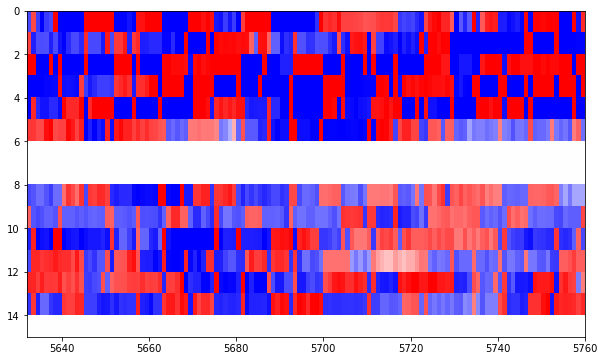

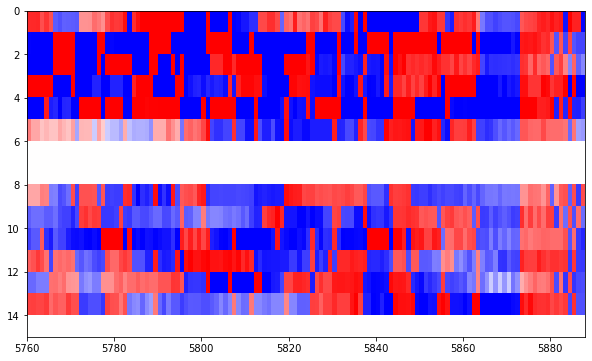

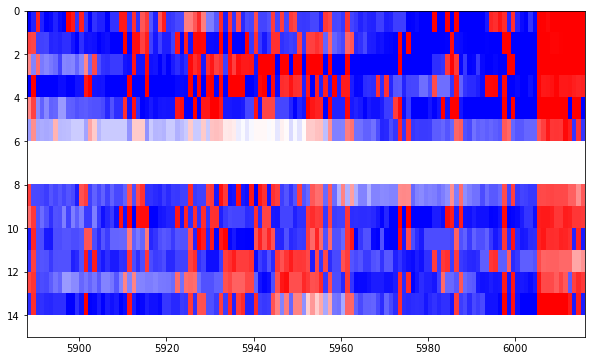

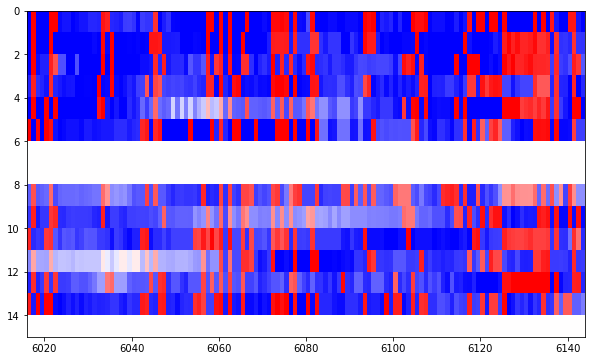

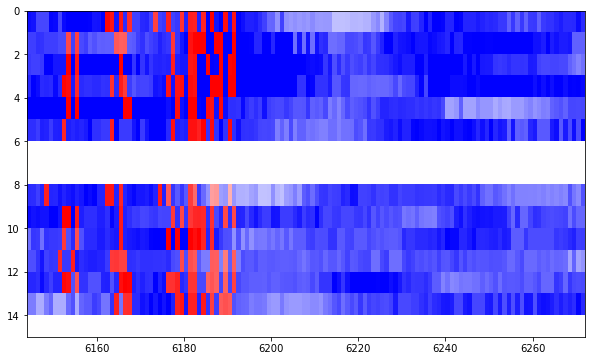

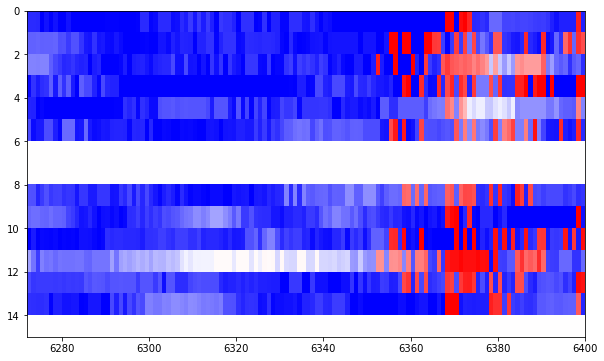

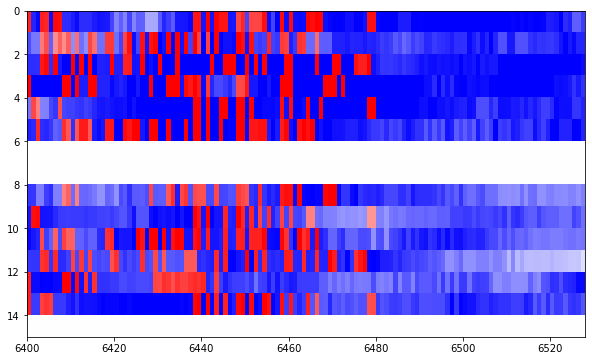

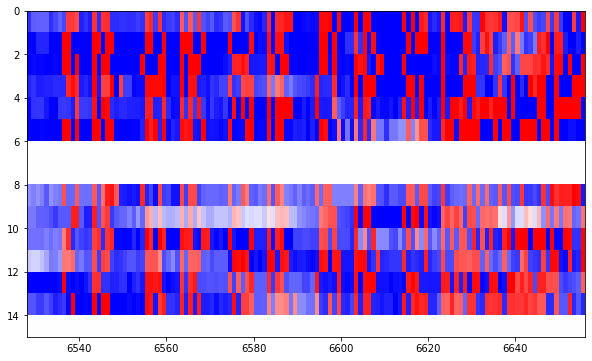

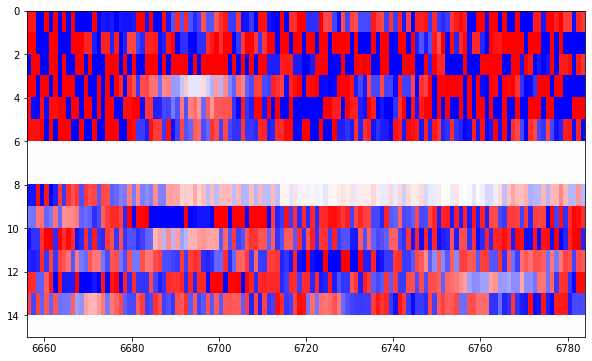

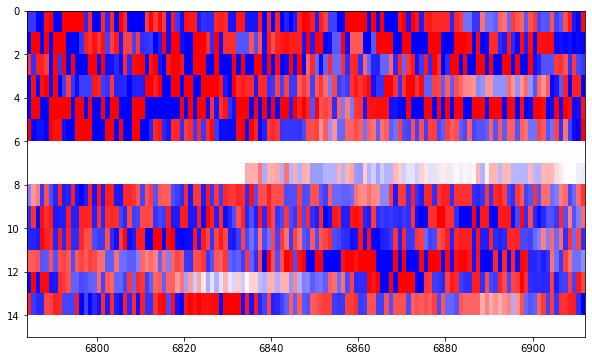

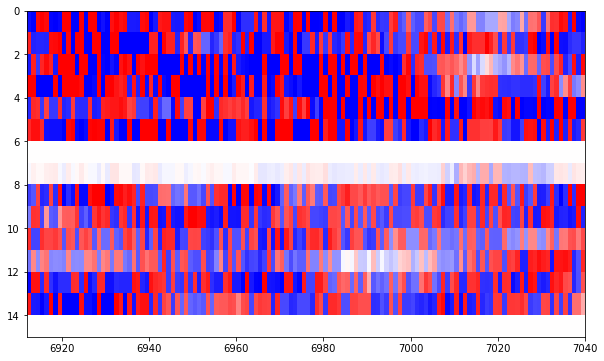

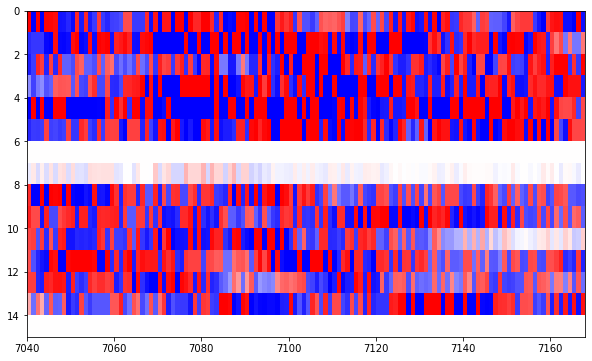

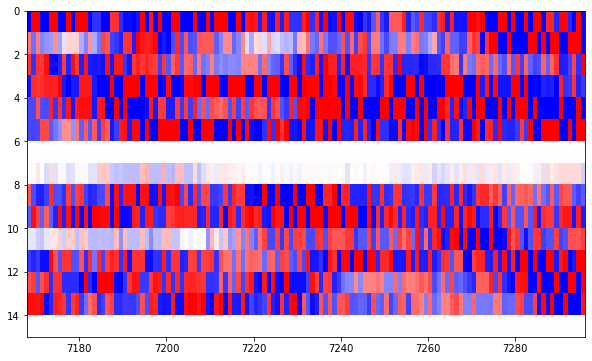

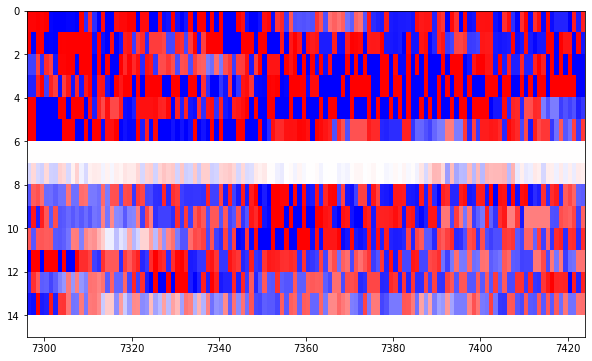

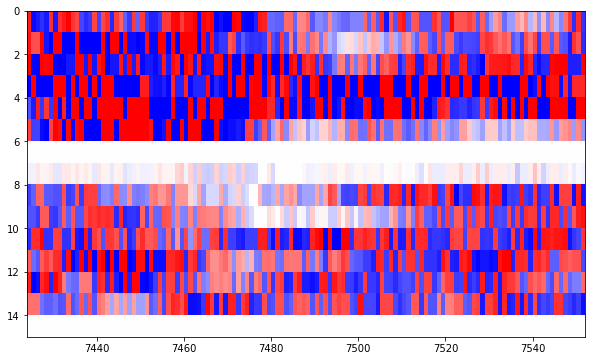

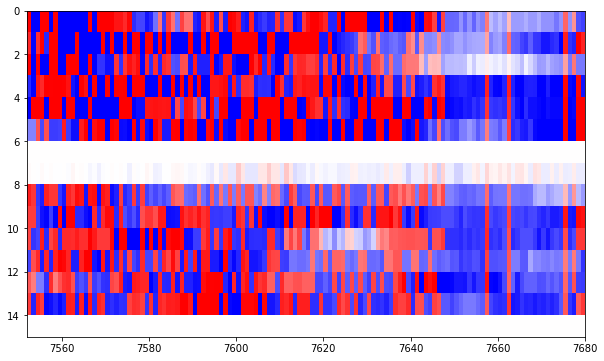

In [18]:
n = 128
for j in range(0, x.shape[1], n):
    plt.figure()
    plt.imshow(x[:, j:j+n], aspect='auto', interpolation='none',
               extent=(j, j+n, x.shape[0], 0),
               vmin=-1, vmax=1, cmap='bwr')